# Split Training Model For The Hybrid Autoencoder

### Library imports.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import numpy as np

2022-06-29 16:55:38.078401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 16:55:38.078422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Initialization of the classical encoder and decoder networks.

In [2]:
latent_dim = 2

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(3, activation ="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(4, activation="elu"),
      layers.Dense(3, activation="elu"),
      layers.Dense(latent_dim, activation="elu"),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(3, activation="elu"),
        layers.Dense(4, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(3, activation="elu")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [3]:
autoencoder = Autoencoder(latent_dim)

2022-06-29 16:55:40.132428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-29 16:55:40.132472: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-29 16:55:40.132504: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BartuDesktop): /proc/driver/nvidia/version does not exist
2022-06-29 16:55:40.132916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def GenerateTargetState():
    return np.array([[0+0j, 1+0j, 0+0j]])
test_state = GenerateTargetState()
print(test_state)

[[0.+0.j 1.+0.j 0.+0.j]]


### Compile the classical autoencoder.

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train the classical autoencoder and obtain the latent space.

In [6]:
x_train = GenerateTargetState()

history = autoencoder.fit(x_train, x_train,
                epochs=300,
                validation_data=(x_train, x_train))

Epoch 1/300
1/1 [==============================] - 1s 686ms/step - loss: 0.3361 - val_loss: 0.3302
Epoch 2/300
1/1 [==============================] - 0s 21ms/step - loss: 0.3302 - val_loss: 0.3245
Epoch 3/300
1/1 [==============================] - 0s 24ms/step - loss: 0.3245 - val_loss: 0.3190
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 0.3190 - val_loss: 0.3135
Epoch 5/300
1/1 [==============================] - 0s 24ms/step - loss: 0.3135 - val_loss: 0.3081
Epoch 6/300
1/1 [==============================] - 0s 26ms/step - loss: 0.3081 - val_loss: 0.3028
Epoch 7/300
1/1 [==============================] - 0s 22ms/step - loss: 0.3028 - val_loss: 0.2975
Epoch 8/300
1/1 [==============================] - 0s 27ms/step - loss: 0.2975 - val_loss: 0.2923
Epoch 9/300
1/1 [==============================] - 0s 21ms/step - loss: 0.2923 - val_loss: 0.2871
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 0.2871 - val_loss: 0.2818
Epoch 11/300
1/1 [

1/1 [==============================] - 0s 26ms/step - loss: 7.3053e-04 - val_loss: 5.8746e-04
Epoch 84/300
1/1 [==============================] - 0s 24ms/step - loss: 5.8746e-04 - val_loss: 4.7481e-04
Epoch 85/300
1/1 [==============================] - 0s 23ms/step - loss: 4.7481e-04 - val_loss: 3.8859e-04
Epoch 86/300
1/1 [==============================] - 0s 23ms/step - loss: 3.8859e-04 - val_loss: 3.2512e-04
Epoch 87/300
1/1 [==============================] - 0s 24ms/step - loss: 3.2512e-04 - val_loss: 2.8097e-04
Epoch 88/300
1/1 [==============================] - 0s 20ms/step - loss: 2.8097e-04 - val_loss: 2.5295e-04
Epoch 89/300
1/1 [==============================] - 0s 22ms/step - loss: 2.5295e-04 - val_loss: 2.3808e-04
Epoch 90/300
1/1 [==============================] - 0s 28ms/step - loss: 2.3808e-04 - val_loss: 2.3355e-04
Epoch 91/300
1/1 [==============================] - 0s 22ms/step - loss: 2.3355e-04 - val_loss: 2.3669e-04
Epoch 92/300
1/1 [==============================] 

1/1 [==============================] - 0s 28ms/step - loss: 1.1970e-07 - val_loss: 1.3387e-07
Epoch 160/300
1/1 [==============================] - 0s 22ms/step - loss: 1.3387e-07 - val_loss: 1.5461e-07
Epoch 161/300
1/1 [==============================] - 0s 26ms/step - loss: 1.5461e-07 - val_loss: 1.7795e-07
Epoch 162/300
1/1 [==============================] - 0s 24ms/step - loss: 1.7795e-07 - val_loss: 2.0086e-07
Epoch 163/300
1/1 [==============================] - 0s 28ms/step - loss: 2.0086e-07 - val_loss: 2.2113e-07
Epoch 164/300
1/1 [==============================] - 0s 25ms/step - loss: 2.2113e-07 - val_loss: 2.3738e-07
Epoch 165/300
1/1 [==============================] - 0s 25ms/step - loss: 2.3738e-07 - val_loss: 2.4878e-07
Epoch 166/300
1/1 [==============================] - 0s 22ms/step - loss: 2.4878e-07 - val_loss: 2.5504e-07
Epoch 167/300
1/1 [==============================] - 0s 27ms/step - loss: 2.5504e-07 - val_loss: 2.5621e-07
Epoch 168/300
1/1 [=======================

Epoch 235/300
1/1 [==============================] - 0s 26ms/step - loss: 3.8267e-10 - val_loss: 3.4658e-10
Epoch 236/300
1/1 [==============================] - 0s 24ms/step - loss: 3.4658e-10 - val_loss: 3.0356e-10
Epoch 237/300
1/1 [==============================] - 0s 24ms/step - loss: 3.0356e-10 - val_loss: 2.6078e-10
Epoch 238/300
1/1 [==============================] - 0s 25ms/step - loss: 2.6078e-10 - val_loss: 2.1860e-10
Epoch 239/300
1/1 [==============================] - 0s 24ms/step - loss: 2.1860e-10 - val_loss: 1.7834e-10
Epoch 240/300
1/1 [==============================] - 0s 23ms/step - loss: 1.7834e-10 - val_loss: 1.3973e-10
Epoch 241/300
1/1 [==============================] - 0s 29ms/step - loss: 1.3973e-10 - val_loss: 1.0554e-10
Epoch 242/300
1/1 [==============================] - 0s 25ms/step - loss: 1.0554e-10 - val_loss: 7.8357e-11
Epoch 243/300
1/1 [==============================] - 0s 25ms/step - loss: 7.8357e-11 - val_loss: 5.4537e-11
Epoch 244/300
1/1 [=========

In [7]:
encoded_st = autoencoder.encoder(x_train).numpy()
decoded_st = autoencoder.decoder(encoded_st).numpy()

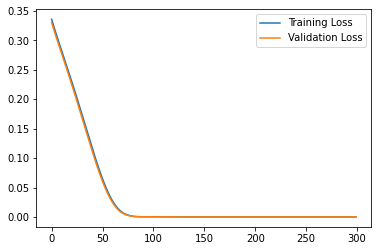

In [8]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [9]:
print(encoded_st)

[[0.6677317  0.02601819]]


In [10]:
import strawberryfields as sf
from strawberryfields import ops
sf.about()


Strawberry Fields: a Python library for continuous-variable quantum circuits.
Copyright 2018-2020 Xanadu Quantum Technologies Inc.

Python version:            3.10.4
Platform info:             Linux-5.4.0-121-generic-x86_64-with-glibc2.31
Installation path:         /home/bartu/miniconda3/envs/qml/lib/python3.10/site-packages/strawberryfields
Strawberry Fields version: 0.23.0
Numpy version:             1.22.4
Scipy version:             1.8.1
SymPy version:             1.10.1
NetworkX version:          2.8.4
The Walrus version:        0.19.0
Blackbird version:         0.4.0
XCC version:               0.2.1
TensorFlow version:        2.9.1


In [11]:
def layer(params, q):
    """CV quantum neural network layer acting on ``N`` modes.

    Args:
        params (list[float]): list of length ``2*(max(1, N-1) + N**2 + n)`` containing
            the number of parameters for the layer
        q (list[RegRef]): list of Strawberry Fields quantum registers the layer
            is to be applied to
    """
    ops.Dgate(tf.clip_by_value(encoded_st[0][0], clip_value_min = -1.5, clip_value_max = 1.5), encoded_st[0][1]) | q[0]
    
    N = len(q)
    M = int(N * (N - 1)) + max(1, N - 1)

    rphi = params[-N+1:]
    s = params[M:M+N]
    dr = params[2*M+N:2*M+2*N]
    dp = params[2*M+2*N:2*M+3*N]
    k = params[2*M+3*N:2*M+4*N]
    
    ops.Rgate(rphi[0]) | q[0]
    
    for i in range(N):
        ops.Sgate(s[i]) | q[i]

    ops.Rgate(rphi[0]) | q[0]

    for i in range(N):
        ops.Dgate(dr[i], dp[i]) | q[i]
        ops.Kgate(k[i]) | q[i]

In [12]:
# Number of modes
modes = 1

# Cutoff dimension (number of Fock states)
cutoff_dim = 3

# Number of layers (depth)
Qlayers = 25

# Number of steps in optimization routine performing gradient descent
reps = 500

# Learning rate
lr = 0.05

# Standard deviation of initial parameters
passive_sd = 0.2
active_sd = 0.01

# The gamma parameter in the penalty function, given by the reference paper.
norm_weight = 200

# Seeds for the RNG functions to be able to reproduce results.
tf.random.set_seed(137)
np.random.seed(137)



### Initialization of layer weights.

In [13]:
def init_weights(modes, layers, active_sd=0.0001, passive_sd=0.1):
    """Initialize a 2D TensorFlow Variable containing normally-distributed
    random weights for an ``N`` mode quantum neural network with ``L`` layers.

    Args:
        modes (int): the number of modes in the quantum neural network
        layers (int): the number of layers in the quantum neural network
        active_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the active parameters
            (displacement, squeezing, and Kerr magnitude)
        passive_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the passive parameters
            (beamsplitter angles and all gate phases)

    Returns:
        tf.Variable[tf.float32]: A TensorFlow Variable of shape
        ``[layers, 2*(max(1, modes-1) + modes**2 + modes)]``, where the Lth
        row represents the layer parameters for the Lth layer.
    """
    # Number of interferometer parameters:
    M = int(modes * (modes - 1)) + max(1, modes - 1)

    # Create the TensorFlow variables
    int1_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    s_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    int2_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    dr_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    dp_weights = tf.random.normal(shape=[layers, modes], stddev=passive_sd)
    k_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)

    weights = tf.concat(
        [int1_weights, s_weights, int2_weights, dr_weights, dp_weights, k_weights], axis=1
    )

    weights = tf.Variable(weights)

    return weights

In [15]:
# defining desired state (single photon state)
target_state = np.zeros(cutoff_dim)
print(target_state)
target_state[2] = 1
print(target_state)
target_state = x_train[0]
print(target_state)
##Below prevents Wigner state plotter check if it impacts representation
#target_state = tf.constant(target_state, dtype=tf.complex64)

[0. 0. 0.]
[0. 0. 1.]
[0.+0.j 1.+0.j 0.+0.j]


In [16]:
# initialize engine and program
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cutoff_dim})
qnn = sf.Program(modes)

# initialize QNN weights
weights = init_weights(modes, Qlayers) # our TensorFlow weights
num_params = np.prod(weights.shape)   # total number of parameters in our model

In [17]:
# Create array of Strawberry Fields symbolic gate arguments, matching
# the size of the weights Variable.
sf_params = np.arange(num_params).reshape(weights.shape).astype(np.str)
sf_params = np.array([qnn.params(*i) for i in sf_params])


# Construct the symbolic Strawberry Fields program by
# looping and applying layers to the program.
with qnn.context as q:
    for k in range(Qlayers):
        layer(sf_params[k], q)

/tmp/ipykernel_44602/2132937993.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


### Definition of the quantum cost function.

In [18]:
def cost(weights):
    # Create a dictionary mapping from the names of the Strawberry Fields
    # free parameters to the TensorFlow weight values.
    mapping = {p.name: w for p, w in zip(sf_params.flatten(), tf.reshape(weights, [-1]))}

    # Run engine
    state = eng.run(qnn, args=mapping).state

    # Extract the statevector
    ket = state.ket()

    # Compute the fidelity between the output statevector
    # and the target state.
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2

    # Objective function to minimize
    #cost = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state) - 1)
    #return cost, fidelity, ket
    # Instead of the Cost function, maybe it is better to break it down to components
    # at least, when the Fock basis is insufficent, it will be visible
    difference = tf.reduce_sum(tf.abs(ket - target_state))
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2
    return difference, fidelity, ket, tf.math.real(state.trace())

### Optimizer definition.

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=lr)

### Train the quantum decoder.

In [20]:
fid_progress = []
loss_progress = []
best_fid = 0

for i in range(reps):
    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        loss, fid, ket, trace = cost(weights)

    # Stores fidelity at each step
    fid_progress.append(fid.numpy())
    
    loss_progress.append(loss)

    if fid > best_fid:
        # store the new best fidelity and best state
        best_fid = fid.numpy()
        learnt_state = ket.numpy()

    # one repetition of the optimization
    gradients = tape.gradient(loss, weights)
    opt.apply_gradients(zip([gradients], [weights]))

    # Prints progress at every rep
    if i % 1 == 0:
        print("Rep: {} Cost: {:.4f} Fidelity: {:.4f} Trace: {:.4f}".format(i, loss, fid, trace))

Rep: 0 Cost: 1.0049 Fidelity: 0.0000 Trace: 0.0000
Rep: 1 Cost: 1.0032 Fidelity: 0.0000 Trace: 0.0000
Rep: 2 Cost: 1.0014 Fidelity: 0.0000 Trace: 0.0000
Rep: 3 Cost: 1.0015 Fidelity: 0.0000 Trace: 0.0000
Rep: 4 Cost: 0.9986 Fidelity: 0.0000 Trace: 0.0000
Rep: 5 Cost: 1.0004 Fidelity: 0.0000 Trace: 0.0000
Rep: 6 Cost: 0.9992 Fidelity: 0.0000 Trace: 0.0000
Rep: 7 Cost: 0.9993 Fidelity: 0.0000 Trace: 0.0000
Rep: 8 Cost: 0.9988 Fidelity: 0.0000 Trace: 0.0000
Rep: 9 Cost: 0.9985 Fidelity: 0.0000 Trace: 0.0000
Rep: 10 Cost: 0.9980 Fidelity: 0.0000 Trace: 0.0000
Rep: 11 Cost: 0.9978 Fidelity: 0.0000 Trace: 0.0000
Rep: 12 Cost: 0.9973 Fidelity: 0.0000 Trace: 0.0000
Rep: 13 Cost: 0.9966 Fidelity: 0.0000 Trace: 0.0000
Rep: 14 Cost: 0.9964 Fidelity: 0.0000 Trace: 0.0000
Rep: 15 Cost: 0.9946 Fidelity: 0.0000 Trace: 0.0000
Rep: 16 Cost: 0.9951 Fidelity: 0.0001 Trace: 0.0001
Rep: 17 Cost: 0.9932 Fidelity: 0.0001 Trace: 0.0001
Rep: 18 Cost: 0.9923 Fidelity: 0.0001 Trace: 0.0001
Rep: 19 Cost: 0.9921 F

Rep: 157 Cost: 0.2464 Fidelity: 0.8191 Trace: 0.8197
Rep: 158 Cost: 0.1698 Fidelity: 0.8096 Trace: 0.8121
Rep: 159 Cost: 0.2308 Fidelity: 0.8088 Trace: 0.8122
Rep: 160 Cost: 0.1526 Fidelity: 0.8192 Trace: 0.8203
Rep: 161 Cost: 0.1611 Fidelity: 0.8108 Trace: 0.8135
Rep: 162 Cost: 0.2100 Fidelity: 0.8013 Trace: 0.8066
Rep: 163 Cost: 0.1654 Fidelity: 0.8173 Trace: 0.8187
Rep: 164 Cost: 0.1793 Fidelity: 0.8180 Trace: 0.8218
Rep: 165 Cost: 0.2188 Fidelity: 0.8135 Trace: 0.8178
Rep: 166 Cost: 0.1511 Fidelity: 0.8196 Trace: 0.8212
Rep: 167 Cost: 0.1732 Fidelity: 0.8212 Trace: 0.8242
Rep: 168 Cost: 0.2030 Fidelity: 0.8139 Trace: 0.8200
Rep: 169 Cost: 0.1598 Fidelity: 0.8239 Trace: 0.8256
Rep: 170 Cost: 0.1440 Fidelity: 0.8245 Trace: 0.8260
Rep: 171 Cost: 0.1725 Fidelity: 0.8218 Trace: 0.8247
Rep: 172 Cost: 0.1431 Fidelity: 0.8291 Trace: 0.8297
Rep: 173 Cost: 0.1994 Fidelity: 0.8185 Trace: 0.8238
Rep: 174 Cost: 0.2054 Fidelity: 0.8155 Trace: 0.8227
Rep: 175 Cost: 0.1547 Fidelity: 0.8279 Trace: 

Rep: 312 Cost: 0.1416 Fidelity: 0.8465 Trace: 0.8484
Rep: 313 Cost: 0.1676 Fidelity: 0.8466 Trace: 0.8476
Rep: 314 Cost: 0.1517 Fidelity: 0.8472 Trace: 0.8481
Rep: 315 Cost: 0.0995 Fidelity: 0.8511 Trace: 0.8514
Rep: 316 Cost: 0.1520 Fidelity: 0.8493 Trace: 0.8515
Rep: 317 Cost: 0.1781 Fidelity: 0.8499 Trace: 0.8513
Rep: 318 Cost: 0.1641 Fidelity: 0.8457 Trace: 0.8482
Rep: 319 Cost: 0.1464 Fidelity: 0.8448 Trace: 0.8470
Rep: 320 Cost: 0.1040 Fidelity: 0.8505 Trace: 0.8508
Rep: 321 Cost: 0.1183 Fidelity: 0.8516 Trace: 0.8524
Rep: 322 Cost: 0.1362 Fidelity: 0.8526 Trace: 0.8529
Rep: 323 Cost: 0.1200 Fidelity: 0.8536 Trace: 0.8536
Rep: 324 Cost: 0.1124 Fidelity: 0.8510 Trace: 0.8517
Rep: 325 Cost: 0.1107 Fidelity: 0.8532 Trace: 0.8535
Rep: 326 Cost: 0.1362 Fidelity: 0.8546 Trace: 0.8548
Rep: 327 Cost: 0.1140 Fidelity: 0.8543 Trace: 0.8546
Rep: 328 Cost: 0.1499 Fidelity: 0.8478 Trace: 0.8508
Rep: 329 Cost: 0.1579 Fidelity: 0.8504 Trace: 0.8519
Rep: 330 Cost: 0.1352 Fidelity: 0.8542 Trace: 

Rep: 467 Cost: 0.1808 Fidelity: 0.8353 Trace: 0.8417
Rep: 468 Cost: 0.1357 Fidelity: 0.8490 Trace: 0.8510
Rep: 469 Cost: 0.1559 Fidelity: 0.8536 Trace: 0.8547
Rep: 470 Cost: 0.1614 Fidelity: 0.8433 Trace: 0.8475
Rep: 471 Cost: 0.1186 Fidelity: 0.8494 Trace: 0.8507
Rep: 472 Cost: 0.1226 Fidelity: 0.8547 Trace: 0.8561
Rep: 473 Cost: 0.1493 Fidelity: 0.8519 Trace: 0.8541
Rep: 474 Cost: 0.1263 Fidelity: 0.8555 Trace: 0.8558
Rep: 475 Cost: 0.1915 Fidelity: 0.8471 Trace: 0.8521
Rep: 476 Cost: 0.1830 Fidelity: 0.8451 Trace: 0.8511
Rep: 477 Cost: 0.1260 Fidelity: 0.8544 Trace: 0.8563
Rep: 478 Cost: 0.1318 Fidelity: 0.8487 Trace: 0.8500
Rep: 479 Cost: 0.1686 Fidelity: 0.8418 Trace: 0.8458
Rep: 480 Cost: 0.1384 Fidelity: 0.8540 Trace: 0.8547
Rep: 481 Cost: 0.1343 Fidelity: 0.8527 Trace: 0.8544
Rep: 482 Cost: 0.1486 Fidelity: 0.8477 Trace: 0.8512
Rep: 483 Cost: 0.1074 Fidelity: 0.8554 Trace: 0.8559
Rep: 484 Cost: 0.1678 Fidelity: 0.8483 Trace: 0.8524
Rep: 485 Cost: 0.2218 Fidelity: 0.8443 Trace: 

### Produce fidelity plot.

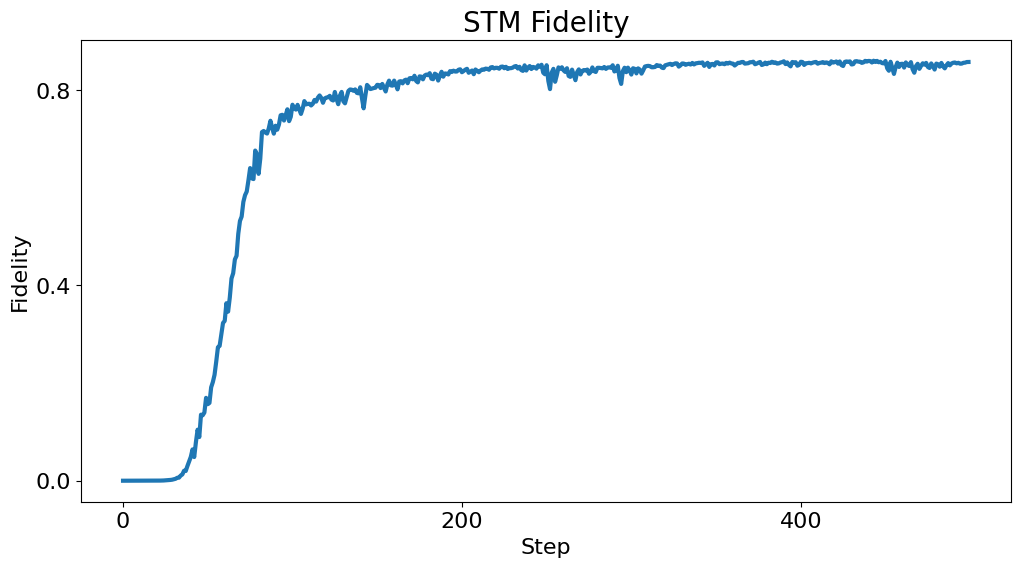

In [50]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(12, 6), dpi = 100)

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.plot(fid_progress, linewidth = 3)
plt.ylabel("Fidelity", fontsize = '16')
ax.yaxis.set_ticks(np.arange(0, 1, 0.4))
plt.xlabel("Epoch", fontsize = '16')
ax.xaxis.set_ticks(np.arange(0, reps, 200))
plt.title('STM Fidelity', fontsize = '20')


plt.savefig('STM_fidelity.png')

### Produce loss plot.

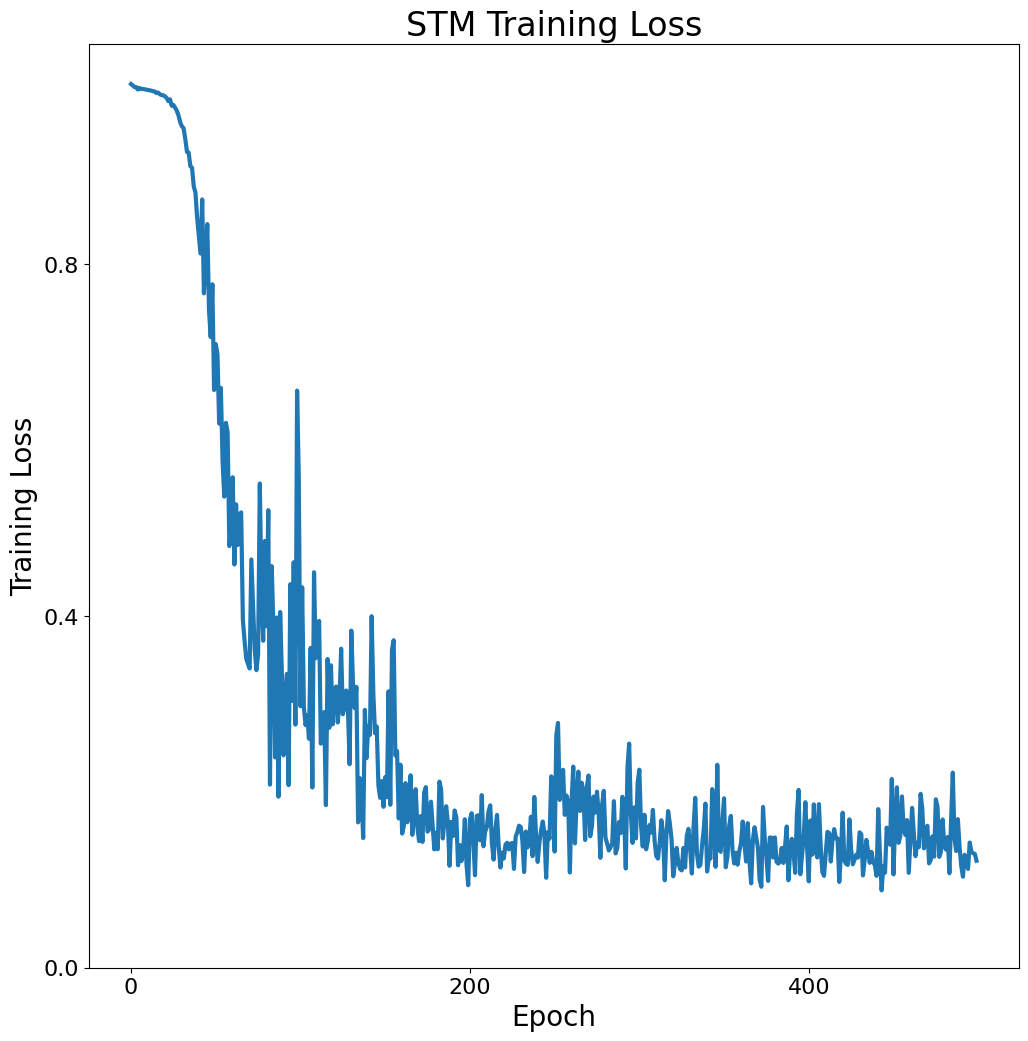

In [55]:
fig, ax = plt.subplots(figsize=(12, 12), dpi = 100)

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.plot(loss_progress, linewidth = 3)
plt.ylabel("Training Loss", fontsize = '20')
ax.yaxis.set_ticks(np.arange(0, 1, 0.4))
plt.xlabel("Epoch", fontsize = '20')
ax.xaxis.set_ticks(np.arange(0, reps, 200))
plt.title('STM Training Loss', fontsize = '24')


plt.savefig('STM_loss.png')

### Definition of the function that plots Wigner functions.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def wigner(rho):
    """This code is a modified version of the 'iterative' method
    of the wigner function provided in QuTiP, which is released
    under the BSD license, with the following copyright notice:

    Copyright (C) 2011 and later, P.D. Nation, J.R. Johansson,
    A.J.G. Pitchford, C. Granade, and A.L. Grimsmo.

    All rights reserved."""
    import copy

    # Domain parameter for Wigner function plots
    l = 5.0
    cutoff = rho.shape[0]

    # Creates 2D grid for Wigner function plots
    x = np.linspace(-l, l, 100)
    p = np.linspace(-l, l, 100)

    Q, P = np.meshgrid(x, p)
    A = (Q + P * 1.0j) / (2 * np.sqrt(2 / 2))

    Wlist = np.array([np.zeros(np.shape(A), dtype=complex) for k in range(cutoff)])

    # Wigner function for |0><0|
    Wlist[0] = np.exp(-2.0 * np.abs(A) ** 2) / np.pi

    # W = rho(0,0)W(|0><0|)
    W = np.real(rho[0, 0]) * np.real(Wlist[0])

    for n in range(1, cutoff):
        Wlist[n] = (2.0 * A * Wlist[n - 1]) / np.sqrt(n)
        W += 2 * np.real(rho[0, n] * Wlist[n])

    for m in range(1, cutoff):
        temp = copy.copy(Wlist[m])
        # Wlist[m] = Wigner function for |m><m|
        Wlist[m] = (2 * np.conj(A) * temp - np.sqrt(m) * Wlist[m - 1]) / np.sqrt(m)

        # W += rho(m,m)W(|m><m|)
        W += np.real(rho[m, m] * Wlist[m])

        for n in range(m + 1, cutoff):
            temp2 = (2 * A * Wlist[n - 1] - np.sqrt(m) * temp) / np.sqrt(n)
            temp = copy.copy(Wlist[n])
            # Wlist[n] = Wigner function for |m><n|
            Wlist[n] = temp2

            # W += rho(m,n)W(|m><n|) + rho(n,m)W(|n><m|)
            W += 2 * np.real(rho[m, n] * Wlist[n])

    return Q, P, W / 2

### Obtain the target and learnt states from the quantum decoder.

In [24]:
rho_target = np.outer(target_state, target_state.conj())
rho_learnt = np.outer(learnt_state, learnt_state.conj())

### Plot the target state as a Wigner function.

/tmp/ipykernel_44602/1595207717.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


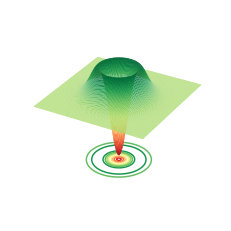

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_target)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()

### Plot the learnt state as a Wigner function.

/tmp/ipykernel_44602/4117463628.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


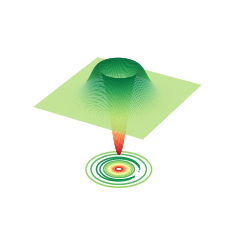

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_learnt)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()